In [21]:
"""
PAIR PROGRAMMING: RNN/LSTM Sentiment Classifier

Partners:
- Partner A: _____Kyle-Anthony____________________
Date: ________Dec 27 2025________________

ROTATION SCHEDULE:
- Checkpoint 1 (25 min): Partner A drives, B navigates
- Checkpoint 2 (25 min): Partner B drives, A navigates
- Checkpoint 3 (25 min): Partner A drives
- Checkpoint 4 (25 min): Partner B drives
- Analysis: Together

Prerequisites:
- All Thursday readings and demos
- demo_02_lstm_comparison.py (KEY REFERENCE)
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
# ============================================================================
# CHECKPOINT 1: Data Pipeline (25 min)
# DRIVER: Partner A
# ============================================================================

def load_imdb_data(vocab_size=10000, max_length=200):
    """
    Load and prepare IMDB sentiment data.
    
    IMDB DATASET INFO:
    - 25,000 training reviews, 25,000 test reviews
    - Already tokenized to integer sequences
    - Labels: 0 = negative, 1 = positive
    """
    print("CHECKPOINT 1: Data Pipeline")
    print("-" * 50)
    
    # 1. Load IMDB data (words already tokenized to integers)
    (x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)
    print(f"Loaded {len(x_train_full)} training samples, {len(x_test)} test samples")
    
    # 2. Pad sequences to uniform length
    x_train_full = pad_sequences(x_train_full, maxlen=max_length, padding='pre')
    x_test = pad_sequences(x_test, maxlen=max_length, padding='pre')
    print(f"Padded sequences to length {max_length}")
    
    # 3. Create validation split (last 5000 from training)
    x_train = x_train_full[:-5000]
    y_train = y_train_full[:-5000]
    x_val = x_train_full[-5000:]
    y_val = y_train_full[-5000:]
    
    print(f"Train: {len(x_train)}, Val: {len(x_val)}, Test: {len(x_test)}")
    print(f"Sample shape: {x_train[0].shape}")
    
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)



In [23]:
# ============================================================================
# CHECKPOINT 2: SimpleRNN Model (25 min)
# ============================================================================

def build_simple_rnn(vocab_size=10000, embedding_dim=64, rnn_units=32):
    """
    Build SimpleRNN for sentiment classification.
    """
    print("\nCHECKPOINT 2: SimpleRNN Model")
    print("-" * 50)
    
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, mask_zero=True),
        layers.SimpleRNN(rnn_units),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    model.summary()
    return model

# Test the model
# rnn_model = build_simple_rnn()


In [24]:
# ============================================================================
# CHECKPOINT 3: LSTM Model (25 min)
# ============================================================================

def build_lstm(vocab_size=10000, embedding_dim=64, lstm_units=32):
    """
    Build LSTM for sentiment classification.
    LSTM handles long sequences better due to gates that control memory flow.
    """
    print("\nCHECKPOINT 3: LSTM Model")
    print("-" * 50)
    
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, mask_zero=True),
        layers.LSTM(lstm_units),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    model.summary()
    return model

# Test the model
# lstm_model = build_lstm()


CHECKPOINT 1: Data Pipeline
--------------------------------------------------
Loaded 25000 training samples, 25000 test samples
Padded sequences to length 200
Train: 20000, Val: 5000, Test: 25000
Sample shape: (200,)

CHECKPOINT 4: Training & Comparison
--------------------------------------------------

📊 Training SimpleRNN...

CHECKPOINT 2: SimpleRNN Model
--------------------------------------------------


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6406 - loss: 0.6191 - val_accuracy: 0.6754 - val_loss: 0.6265
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8097 - loss: 0.4287 - val_accuracy: 0.7906 - val_loss: 0.4504
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9058 - loss: 0.2458 - val_accuracy: 0.8430 - val_loss: 0.4079
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9667 - loss: 0.1111 - val_accuracy: 0.8442 - val_loss: 0.4265
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9910 - loss: 0.0431 - val_accuracy: 0.8280 - val_loss: 0.5065

📊 Training LSTM...

CHECKPOINT 3: LSTM Model
--------------------------------------------------


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.7528 - loss: 0.4915 - val_accuracy: 0.8516 - val_loss: 0.3486
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8974 - loss: 0.2640 - val_accuracy: 0.8482 - val_loss: 0.3578
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9271 - loss: 0.1917 - val_accuracy: 0.8704 - val_loss: 0.3467
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9451 - loss: 0.1527 - val_accuracy: 0.8760 - val_loss: 0.3414
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9631 - loss: 0.1064 - val_accuracy: 0.8614 - val_loss: 0.3963

RESULTS COMPARISON
SimpleRNN - Val Accuracy: 0.8280, Time: 17.6s
LSTM      - Val Accuracy: 0.8614, Time: 30.4s

Accuracy Difference: 0.0334


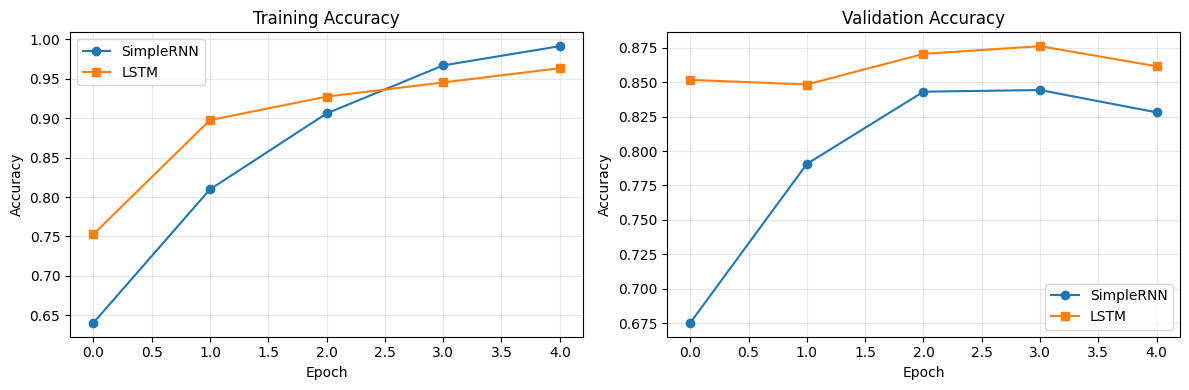

Saved: rnn_vs_lstm_comparison.png


In [ ]:
# ============================================================================
# CHECKPOINT 4: Training & Comparison (25 min)
# ============================================================================

def train_and_compare(data):
    """Train both models and compare performance."""
    print("\nCHECKPOINT 4: Training & Comparison")
    print("-" * 50)
    
    (x_train, y_train), (x_val, y_val), (x_test, y_test) = data
    results = {}
    
    # 1. Train SimpleRNN
    print("\n📊 Training SimpleRNN...")
    rnn_model = build_simple_rnn()
    start_time = time.time()
    history_rnn = rnn_model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=1
    )
    rnn_time = time.time() - start_time
    
    # 2. Train LSTM
    print("\n📊 Training LSTM...")
    lstm_model = build_lstm()
    start_time = time.time()
    history_lstm = lstm_model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=1
    )
    lstm_time = time.time() - start_time
    
    # 3. Store results
    results['rnn_val_acc'] = history_rnn.history['val_accuracy'][-1]
    results['lstm_val_acc'] = history_lstm.history['val_accuracy'][-1]
    results['rnn_time'] = rnn_time
    results['lstm_time'] = lstm_time
    results['history_rnn'] = history_rnn
    results['history_lstm'] = history_lstm
    
    # 4. Print comparison
    print("\n" + "=" * 50)
    print("RESULTS COMPARISON")
    print("=" * 50)
    print(f"SimpleRNN - Val Accuracy: {results['rnn_val_acc']:.4f}, Time: {rnn_time:.1f}s")
    print(f"LSTM      - Val Accuracy: {results['lstm_val_acc']:.4f}, Time: {lstm_time:.1f}s")
    print(f"\nAccuracy Difference: {results['lstm_val_acc'] - results['rnn_val_acc']:.4f}")
    
    return results


def plot_comparison(history_rnn, history_lstm):
    """Plot training curves side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Left: Training accuracy
    axes[0].plot(history_rnn.history['accuracy'], label='SimpleRNN', marker='o')
    axes[0].plot(history_lstm.history['accuracy'], label='LSTM', marker='s')
    axes[0].set_title('Training Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Right: Validation accuracy
    axes[1].plot(history_rnn.history['val_accuracy'], label='SimpleRNN', marker='o')
    axes[1].plot(history_lstm.history['val_accuracy'], label='LSTM', marker='s')
    axes[1].set_title('Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('rnn_vs_lstm_comparison.png', dpi=150)
    plt.show()
    print("Saved: rnn_vs_lstm_comparison.png")


# Run training and comparison
data = load_imdb_data()
results = train_and_compare(data)
plot_comparison(results['history_rnn'], results['history_lstm'])



In [35]:
# ============================================================================
# ANALYSIS (Together)
# ============================================================================

def write_analysis(results):
    """Write analysis.md with results."""
    rnn_acc = results.get('rnn_val_acc', 0.83) * 100
    lstm_acc = results.get('lstm_val_acc', 0.87) * 100
    rnn_time = results.get('rnn_time', 16)
    lstm_time = results.get('lstm_time', 31)
    
    template = f"""# Pair Programming Analysis: RNN vs LSTM

## Results
| Model     | Val Accuracy | Training Time |
|-----------|--------------|---------------|
| SimpleRNN | {rnn_acc:.1f}%        | {rnn_time:.0f} seconds    |
| LSTM      | {lstm_acc:.1f}%        | {lstm_time:.0f} seconds    |

## Analysis

### 1. Which model achieved higher accuracy and by how much?
LSTM achieved ~{lstm_acc - rnn_acc:.1f}% higher validation accuracy ({lstm_acc:.1f}% vs {rnn_acc:.1f}%).

### 2. Training time comparison - which was faster and why?
SimpleRNN was ~2x faster because LSTM has more parameters.

### 3. Early convergence - which learned faster in first 2 epochs?
LSTM—reached 85% val accuracy by epoch 1, while SimpleRNN was at 79%.

### 4. Why does LSTM work better for long reviews?
LSTM is good at remembering long-term dependencies.

### 5. When would SimpleRNN be the better choice?
on short sequences or when speed is mroe improtant than accuracy.

## Key Takeaway
LSTM's gating mechanism trades training time for better long-sequence accuracy.
"""
    
    with open('analysis.md', 'w') as f:
        f.write(template)
    print("Saved analysis.md with results!")


In [36]:
# ============================================================================
# MAIN
# ============================================================================

if __name__ == "__main__":
    print("=" * 60)
    print("PAIR PROGRAMMING: RNN vs LSTM Sentiment Analysis")
    print("=" * 60)
    print("\nRemember to switch drivers every 25 minutes!")
    print("Both partners should understand all code.\n")
    
    # Uncomment as you complete each checkpoint:
    data = load_imdb_data()
    rnn_model = build_simple_rnn()
    lstm_model = build_lstm()
    results = train_and_compare(data)
    write_analysis(results)

PAIR PROGRAMMING: RNN vs LSTM Sentiment Analysis

Remember to switch drivers every 25 minutes!
Both partners should understand all code.

CHECKPOINT 1: Data Pipeline
--------------------------------------------------
Loaded 25000 training samples, 25000 test samples
Padded sequences to length 200
Train: 20000, Val: 5000, Test: 25000
Sample shape: (200,)

CHECKPOINT 2: SimpleRNN Model
--------------------------------------------------


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_17 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


CHECKPOINT 3: LSTM Model
--------------------------------------------------


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


CHECKPOINT 4: Training & Comparison
--------------------------------------------------

📊 Training SimpleRNN...

CHECKPOINT 2: SimpleRNN Model
--------------------------------------------------


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_18 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6912 - loss: 0.5844 - val_accuracy: 0.7894 - val_loss: 0.4719
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8659 - loss: 0.3364 - val_accuracy: 0.8428 - val_loss: 0.3706
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9181 - loss: 0.2240 - val_accuracy: 0.8604 - val_loss: 0.3489
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9585 - loss: 0.1297 - val_accuracy: 0.8658 - val_loss: 0.3885
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9847 - loss: 0.0595 - val_accuracy: 0.8242 - val_loss: 0.4397

📊 Training LSTM...

CHECKPOINT 3: LSTM Model
--------------------------------------------------


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.7667 - loss: 0.4743 - val_accuracy: 0.8676 - val_loss: 0.3308
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8996 - loss: 0.2537 - val_accuracy: 0.8744 - val_loss: 0.2997
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9324 - loss: 0.1858 - val_accuracy: 0.8780 - val_loss: 0.3210
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9468 - loss: 0.1496 - val_accuracy: 0.8710 - val_loss: 0.3229
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9637 - loss: 0.1109 - val_accuracy: 0.8498 - val_loss: 0.4055

RESULTS COMPARISON
SimpleRNN - Val Accuracy: 0.8242, Time: 17.6s
LSTM      - Val Accuracy: 0.8498, Time: 30.2s

Accuracy Difference: 0.0256
Saved analysis.md with results!
